In [1]:
import sys
sys.path.append("../") 
from infer_veritas import  *
from truthfinder import *

import dill as pickle

In [2]:
%%time
TR=truthnet(datapath='../validation/data/SUD.csv',target_label=None,VERBOSE=True)
TR.fit(shapnum=10)

with gzip.open('tmp1_veritas_001_SUD.pkl.gz', 'wb') as file:
    pickle.dump(TR, file)

rf=TR.calibrate(calibration_num=5000)

with gzip.open('veritas_001_SUD.pkl.gz', 'wb') as file:
    pickle.dump(TR, file)

             6294 6296 6298 6314 6315 6317 6319 6325 6326 6327  ... 6408 6409  \
Interview_ID                                                    ...             
49723           1    1         1    1    1    1                 ...             
49724                2         4    4    4    4                 ...             
49728                1         1    1    2    1                 ...    2    1   
49729           1    1         1    1    1    1                 ...             
49730                2         1    1    1    1    2            ...             
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
89614                2         1    2    3    2              1  ...             
89679           1    1         1    1    1    1                 ...             
90638                1         1    1    2    1                 ...         2   
91322                2         2    3    2    3              2  ...             
92378                2      

  0%|          | 0/10 [00:00<?, ?it/s]

100%|███████████████████████████████████████| 5000/5000 [10:04<00:00,  8.28it/s]


ckeck passed


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [lognorm] [0.09 sec] [RSS: 0.40519] [loc=-0.015 scale=0.567]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [smoothline] >Smoothing by interpolation..
[distfit] >INFO> [lognorm] [0.11 sec] [RSS: 29.126] [loc=0.138 scale=0.098]
[distfit] >INFO> Compute confidence intervals [parametric]


CPU times: user 19min 9s, sys: 31.6 s, total: 19min 40s
Wall time: 19min 3s


In [3]:
TR.veritas_model

{'version': '0.0.1',
 'model': qnet.Qnet,
 'problem': '',
 'dist_lower': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fd8485a0a60>,
 'LOWER_THRESHOLD': 0.4257059161256135,
 'dist_veritas': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fd8485a02b0>,
 'VERITAS_THRESHOLD': 0.43095410027422953}

In [4]:
M=TR.veritas_model

In [16]:
M['dist_veritas'].cdf(.35)


0.9371783002317865

<AxesSubplot:xlabel='lower', ylabel='Density'>

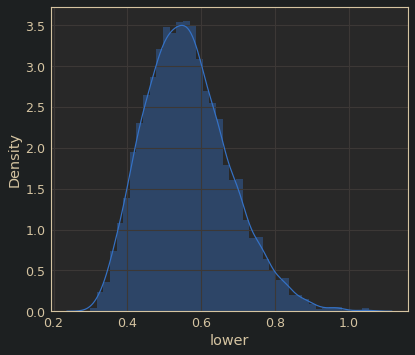

In [102]:
from jupyterthemes import jtplot
jtplot.style()
import seaborn as sns
sns.distplot(rf[0].lower)

<AxesSubplot:xlabel='veritas', ylabel='Density'>

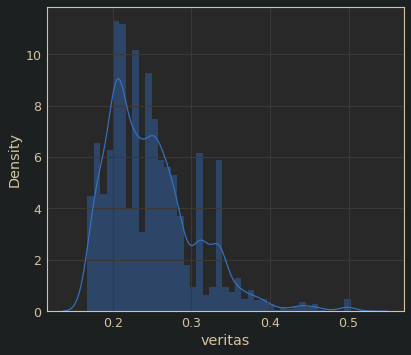

In [104]:
sns.distplot(rf[0].veritas)

In [35]:
def drop_empty_string_keys(input_dict):
    # Create a new dictionary, excluding keys with empty string values
    cleaned_dict = {key: value for key, value in input_dict.items() if value != ''}
    return cleaned_dict

In [51]:
df=pd.read_csv('../validation/data/SUD.csv',index_col=0,
            keep_default_na=False,dtype=str)
featurenames=M['model'].feature_names
training_index=M['model'].training_index
test_index=np.array([x for x in df.index.values if x not in training_index])
df_test=df.loc[test_index,:][featurenames]
D=df_test.T.to_dict()
D1={k:drop_empty_string_keys(v) for k,v in D.items()}
D=[{'SUB'+str(k):v} for k,v in D1.items()]

In [52]:
len(df_test.columns)

41

In [117]:
df_train=df.loc[training_index,:][featurenames]
Xt=df_train.values.astype(str)

<AxesSubplot:ylabel='Density'>

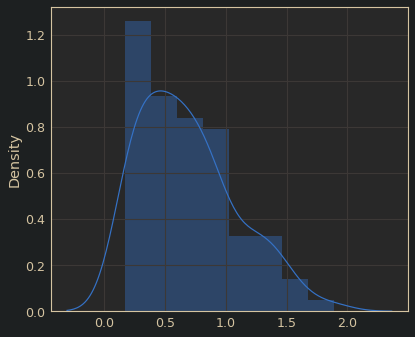

In [118]:
sns.distplot(funcm(Xt[:100],M['model']))

In [53]:
X=df_test.values.astype(str)

<AxesSubplot:ylabel='Density'>

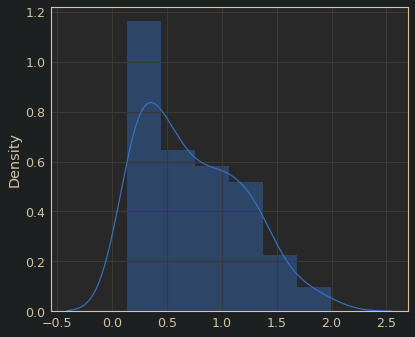

In [115]:
sns.distplot(funcm(X[:100],M['model']))

In [ ]:
funcm(X[10],M['model'])

In [50]:
len(M['model'].feature_names)

41

In [56]:
Rsud=reveal(D,M,perturb=0,model_path=False,score=False)

ckeck passed


In [73]:
res=pd.DataFrame({x['subject_id']:[x['lower_threshold'],x['lower_prob'],x['veritas'],x['veritas_prob']] for x in  Rsud[0]}).T
res.columns=['lower','lower_p','veritas','veritas_p']
res.index.size

875

<AxesSubplot:>

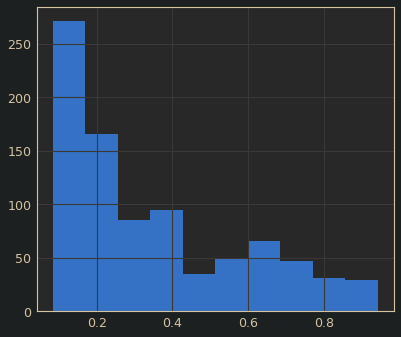

In [106]:
res.veritas.hist()

<AxesSubplot:>

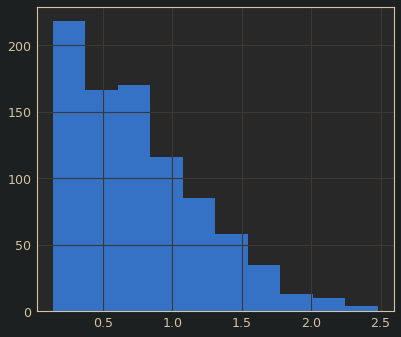

In [107]:
res.lower.hist()

<AxesSubplot:xlabel='lower', ylabel='veritas'>

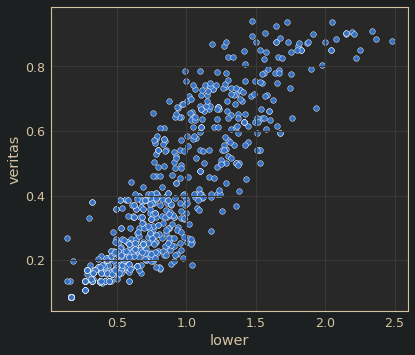

In [120]:
sns.scatterplot(x=res.lower,y=res.veritas)

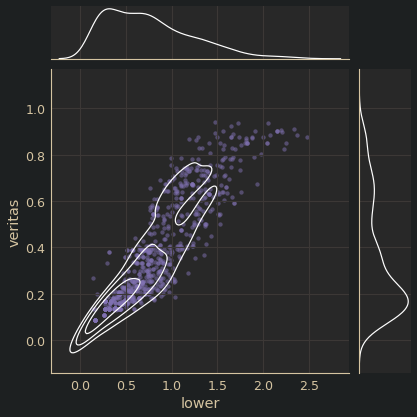

In [163]:
g=sns.jointplot(data=res,x='lower',y='veritas',kind='kde',levels=4, 
                thresh=.25,color='w',lw=4)
g.plot_joint(sns.scatterplot, color='m', zorder=0,alpha=.5,s=15,edgecolor='m')


In [177]:
res[(res.lower>1.02) & (res.veritas<.43)]#.index.size

,lower,lower_p,veritas,veritas_p
SUB52074,1.088252,0.999670,0.420672,0.982116
SUB52521,1.221582,0.999967,0.406250,0.977041
SUB52525,1.058473,0.999454,0.393918,0.971495
SUB52733,1.174073,0.999924,0.396524,0.972775
SUB52742,1.066755,0.999525,0.406250,0.977041
SUB53214,1.238951,0.999975,0.406250,0.977041
SUB53223,1.173936,0.999924,0.406250,0.977041
SUB57806,1.042462,0.999286,0.256898,0.651574
SUB58155,1.102624,0.999741,0.406250,0.977041
SUB58393,1.078827,0.999613,0.361494,0.949055


In [172]:
pd.concat([res[(res.lower<.3)],res[(res.lower<1) & (res.veritas>.43)]]).drop_duplicates().index.size

56

In [170]:
res[(res.lower<1) & (res.veritas>.43)].index.size

50

In [109]:
res[(res.lower<.5) | (res.veritas>.5)]

,lower,lower_p,veritas,veritas_p
SUB50271,1.161982,0.999907,0.740048,0.999836
SUB50272,1.283330,0.999989,0.544539,0.997576
SUB51290,1.359701,0.999997,0.714286,0.999772
SUB51389,1.135750,0.999853,0.743151,0.999842
SUB51519,1.387588,0.999998,0.728199,0.999810
...,...,...,...,...
SUB86020,1.107346,0.999761,0.666716,0.999575
SUB86991,1.510334,1.000000,0.593750,0.998827
SUB88195,1.324628,0.999995,0.517572,0.996335
SUB89614,1.547233,1.000000,0.776042,0.999895


In [88]:
A=[x for x in Rsud[0] if (x['lower_threshold'] > .5) and (x['veritas'] <.4)]

In [89]:
len(A)

276

In [99]:
mg=[x for x in Rsud[0] if (x['lower_threshold'] < .5) or (x['veritas'] > .45)]

In [100]:
len(mg)

570

In [93]:
len(mg)

598

In [178]:
int(6.0)

6

In [179]:
! [wd]

/bin/bash: line 1: [wd]: command not found


In [180]:
! pwd

/home/ishanu/ZED/Research/truthnet/veritas_test/ntb
